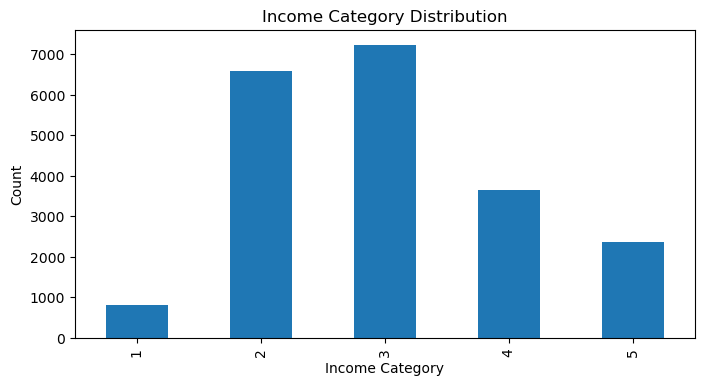

In [4]:
import pandas as pd
import numpy as np

# Read the data
data = pd.read_csv("housing.csv")

# Check if 'income_cat' exists, if not create it
# This is just an example - you should adjust the logic based on your actual data
if "income_cat" not in data.columns:
    # Assuming there's a 'median_income' column we can use to create income categories
    if "median_income" in data.columns:
        # Create income_cat based on median_income
        data["income_cat"] = pd.cut(data["median_income"],
                                   bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                   labels=[1, 2, 3, 4, 5])
    else:
        # If there's no median_income, create a dummy income_cat for demonstration
        # In a real scenario, you'd need to determine the appropriate column to use
        print("Warning: Creating dummy income_cat column. Check your data structure.")
        data["income_cat"] = 1  # Default value

from sklearn.model_selection import StratifiedShuffleSplit
Split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in Split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

import matplotlib.pyplot as plt
# Plot the income_cat distribution
plt.figure(figsize=(8, 4))
data["income_cat"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.title("Income Category Distribution")
plt.show()

In [5]:
for sett in (strat_train_set,strat_test_set):
    sett.drop("income_cat",axis=1,inplace=True)



<Axes: xlabel='longitude'>

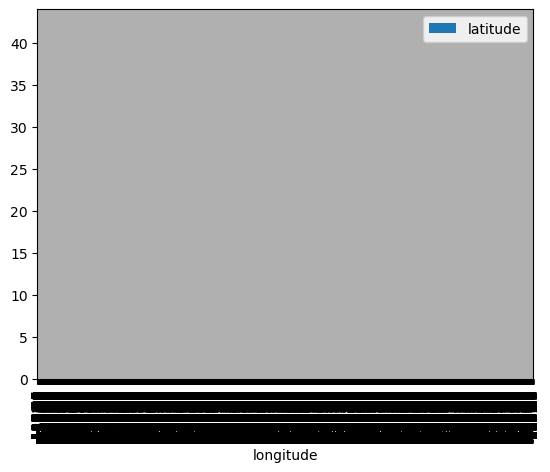

In [3]:
df = strat_train_set.copy()
import matplotlib.pyplot as plt
df.plot(kind="bar",x="longitude", y="latitude", grid=True)